# Лабораторная работа 3

# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

## Цель

изучение способов предварительной обработки данных для дальнейшего формирования моделей.

## Задание:

1. Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
2. Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
обработку пропусков в данных;
кодирование категориальных признаков;
масштабирование данных.

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk

## Загрузка и первичный анализ данных

In [2]:
data = pd.read_csv('fake_job_postings.csv')

In [3]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
data.shape

(17880, 18)

In [6]:
# проверим есть ли пропущенные значения
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [7]:
# типы колонок
data.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

## 1. Обработка пропусков в данных

In [11]:
# Удаление строк, содержащих пустые значения
data_new = data.dropna(axis=0, how='any')
(data.shape, data_new.shape)

((17880, 18), (774, 18))

In [12]:
data_new.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

## 2. Преобразование категориальных признаков в числовые

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [28]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(data_new['required_education'])
cat_enc_le

array([4, 1, 7, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 7, 1, 1, 1, 1, 7, 7,
       1, 1, 7, 3, 2, 3, 1, 4, 1, 7, 2, 7, 3, 2, 3, 1, 3, 6, 1, 1, 4, 1, 3,
       4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 7, 1, 3, 7, 1, 1, 1, 3, 1, 1, 0, 1,
       3, 1, 1, 7, 7, 3, 1, 1, 1, 1, 1, 3, 3, 0, 1, 7, 1, 3, 3, 1, 1, 7, 7,
       1, 3, 3, 1, 1, 3, 7, 1, 1, 1, 3, 1, 1, 7, 1, 7, 3, 3, 1, 1, 7, 7, 1,
       1, 8, 7, 3, 3, 1, 1, 3, 7, 3, 7, 1, 1, 7, 1, 1, 1, 1, 6, 3, 7, 0, 7,
       1, 1, 1, 1, 1, 1, 3, 1, 7, 7, 7, 3, 3, 7, 3, 1, 1, 1, 3, 1, 1, 3, 7,
       7, 7, 4, 7, 1, 3, 1, 1, 1, 7, 1, 1, 3, 1, 0, 8, 7, 7, 1, 3, 1, 1, 3,
       7, 1, 7, 1, 3, 3, 3, 3, 2, 4, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1,
       3, 1, 3, 1, 1, 1, 1, 0, 1, 1, 7, 1, 7, 7, 1, 1, 1, 1, 7, 7, 1, 4, 7,
       1, 1, 7, 7, 1, 1, 4, 7, 1, 1, 1, 3, 6, 2, 1, 3, 1, 4, 7, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 7, 1, 1, 7, 3, 3, 1, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 1, 1, 1, 1, 6, 3, 1, 1, 1, 4, 3, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 4,

In [29]:
data_new['required_education'].unique()

array(["Master's Degree", "Bachelor's Degree", 'Unspecified',
       'High School or equivalent', 'Certification',
       'Some College Coursework Completed', 'Associate Degree',
       'Vocational', 'Vocational - HS Diploma', 'Professional'], dtype=object)

In [30]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array(['Associate Degree', "Bachelor's Degree", 'Certification',
       'High School or equivalent', "Master's Degree", 'Professional',
       'Some College Coursework Completed', 'Unspecified', 'Vocational',
       'Vocational - HS Diploma'], dtype=object)

## 3. Кодирование категорий наборами бинарных значений - one-hot encoding

In [48]:
ohe = OneHotEncoder()
data_encoded, data_categories = data_new['required_education'].factorize()
cat_enc_ohe = ohe.fit_transform(data_encoded.reshape(-1, 1))
cat_enc_ohe.shape

(774, 10)

In [49]:
data_encoded.shape

(774,)

In [50]:
cat_enc_ohe

<774x10 sparse matrix of type '<type 'numpy.float64'>'
	with 774 stored elements in Compressed Sparse Row format>

In [51]:
cat_enc_ohe.todense()[0:10]

matrix([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [52]:
data_categories

Index([u'Master's Degree', u'Bachelor's Degree', u'Unspecified',
       u'High School or equivalent', u'Certification',
       u'Some College Coursework Completed', u'Associate Degree',
       u'Vocational', u'Vocational - HS Diploma', u'Professional'],
      dtype='object')

## Масштабирование данных

Для масштабирования данных будем использовать другой набор данных

In [54]:
data = pd.read_csv('winequality-red.csv')

In [55]:
data.shape

(1599, 12)

In [56]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [57]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [58]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [59]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [60]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['fixed acidity']])

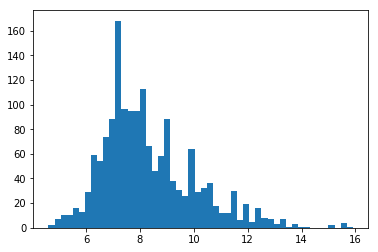

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(data['fixed acidity'], 50)
plt.show()

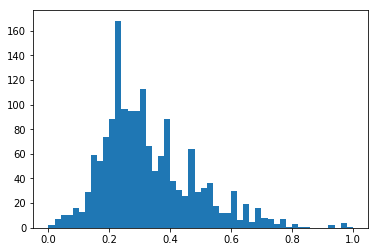

In [63]:
plt.hist(sc1_data, 50)
plt.show()

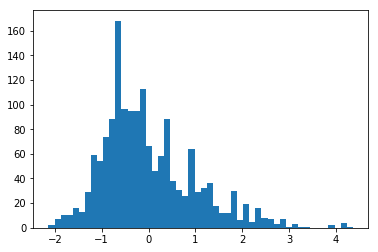

In [65]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['fixed acidity']])
plt.hist(sc2_data, 50)
plt.show()

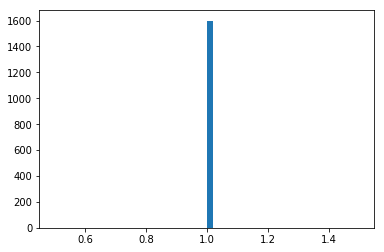

In [67]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['fixed acidity']])
plt.hist(sc3_data, 50)
plt.show()